Analysis

Trend 1: There were more drivers in urban areas

Trend 2: Rural areas had higher average fares.

Trend 3: Overall, urban and suburban areas utilized ride sharing
than rural areas.

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
cities_data=pd.read_csv("raw data/city_data.csv")
rides_data=pd.read_csv("raw data/ride_data.csv")

In [4]:
cities_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
rides_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
cities_and_rides=pd.merge(rides_data,cities_data, on='city')
cities_and_rides.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [155]:
#average fare per city and type
city_group=cities_and_rides.groupby(["city","type"])
average_fare=city_group["fare"].mean().reset_index()
average_fare_by_type=average_fare.set_index('type')
average_fare_urban=average_fare_by_type.loc["Urban"]
average_fare_rural=average_fare_by_type.loc["Rural"]
average_fare_suburban=average_fare_by_type.loc["Suburban"]

#total number of rides per city
count_rides=city_group['ride_id'].count().reset_index()
count_rides_by_type=count_rides.set_index('type')
count_rides_urban=count_rides_by_type.loc["Urban"]
count_rides_rural=count_rides_by_type.loc["Rural"]
count_rides_suburban=count_rides_by_type.loc["Suburban"]

#total number of drivers per city
drivers=cities_data[["city","driver_count","type"]]
drivers_by_type=drivers.set_index('type')
drivers_urban=drivers_by_type.loc["Urban"]
drivers_rural=drivers_by_type.loc["Rural"]
drivers_suburban=drivers_by_type.loc["Suburban"]



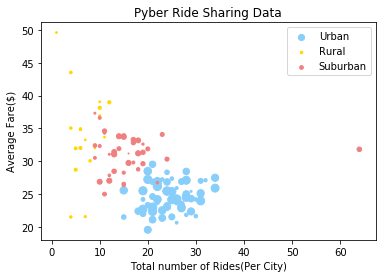

In [167]:
#plot data for Urban cities

x_axis_urban= count_rides_urban['ride_id']
y_axis_urban= average_fare_urban['fare']
plt.scatter(x_axis_urban,y_axis_urban, color="lightskyblue",s=drivers_urban['driver_count'],alpha=1.0,
           label="Urban")

#plot data for Rural cities
x_axis_rural= count_rides_rural['ride_id']
y_axis_rural= average_fare_rural['fare']
plt.scatter(x_axis_rural,y_axis_rural,color="gold", s=drivers_rural['driver_count'],alpha=1.0,
            label="Rural")

#plot data for Suburban cities
x_axis_suburban= count_rides_suburban['ride_id']
y_axis_suburban= average_fare_suburban['fare']
plt.scatter(x_axis_suburban,y_axis_suburban,color="lightcoral",s=drivers_suburban['driver_count'],
            alpha=1.0, label="Suburban")
plt.legend(loc="best")
plt.xlabel("Total number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
plt.show()


In [15]:
#total fares from data
total_fares=cities_and_rides["fare"].sum()
#percentage of total fares by city type
city_type=cities_and_rides.groupby('type')
total_fares_by_type=city_type.sum().reset_index()

total_fares_by_type
type_index=total_fares_by_type.set_index('type')
rural_fare=type_index.loc[["Rural"],["fare"]]
percentage_rural_fare=((rural_fare["fare"])/(total_fares)*100)
print(percentage_rural_fare)
urban_fare=type_index.loc[["Urban"],["fare"]]
percentage_urban_fare=((urban_fare["fare"])/(total_fares)*100)
print(percentage_urban_fare)
suburban_fare=type_index.loc[["Suburban"],["fare"]]
percentage_suburban_fare=((suburban_fare["fare"])/(total_fares)*100)
print(percentage_suburban_fare)

type
Rural    6.579786
Name: fare, dtype: float64
type
Urban    61.974463
Name: fare, dtype: float64
type
Suburban    31.44575
Name: fare, dtype: float64


In [16]:
#total rides from data
total_rides=cities_and_rides["ride_id"].count()
#percentage of total rides by city type
total_rides_by_type=city_type.count().reset_index()
type_index=total_rides_by_type.set_index('type')
rural_rides=type_index.loc[["Rural"],["ride_id"]]
percentage_rural_rides=((rural_rides["ride_id"])/(total_rides)*100)
print(percentage_rural_rides)
urban_rides=type_index.loc[["Urban"],["ride_id"]]
percentage_urban_rides=((urban_rides["ride_id"])/(total_rides)*100)
print(percentage_urban_rides)
suburban_rides=type_index.loc[["Suburban"],["ride_id"]]
percentage_suburban_rides=((suburban_rides["ride_id"])/(total_rides)*100)
print(percentage_suburban_rides)

type
Rural    5.193187
Name: ride_id, dtype: float64
type
Urban    67.511425
Name: ride_id, dtype: float64
type
Suburban    27.295388
Name: ride_id, dtype: float64


In [17]:
#total drivers from data
total_drivers=cities_data["driver_count"].sum()
#percentage of total drivers by city type
city_type=cities_data.groupby('type')
total_drivers_by_type=city_type.sum().reset_index()
type_index=total_drivers_by_type.set_index('type')
rural_drivers=type_index.loc[["Rural"],["driver_count"]]
percentage_rural_drivers=((rural_drivers["driver_count"])/(total_drivers)*100)
print(percentage_rural_drivers)
urban_drivers=type_index.loc[["Urban"],["driver_count"]]
percentage_urban_drivers=((urban_drivers["driver_count"])/(total_drivers)*100)
print(percentage_urban_drivers)
suburban_drivers=type_index.loc[["Suburban"],["driver_count"]]
percentage_suburban_drivers=((suburban_drivers["driver_count"])/(total_drivers)*100)
print(percentage_suburban_drivers)


type
Rural    3.105405
Name: driver_count, dtype: float64
type
Urban    77.844133
Name: driver_count, dtype: float64
type
Suburban    19.050463
Name: driver_count, dtype: float64


In [21]:
#pie charts
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_fare,percentage_urban_fare,percentage_suburban_fare]

colors=["gold","lightskyblue","lightcoral"]
explode=(0,0.1,0)

In [26]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type")

Text(0.5,1,'Percentage of Total Fares by City Type')

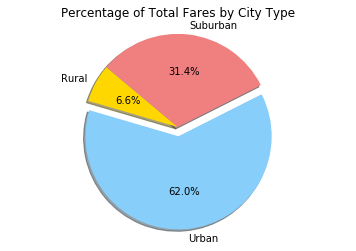

In [27]:
plt.show()

In [32]:
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_rides,percentage_urban_rides,percentage_suburban_rides]
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0.1,0)

In [33]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")

Text(0.5,1,'Percentage of Total Rides by City Type')

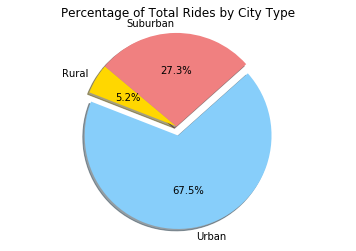

In [34]:
plt.show()

In [35]:
labels=["Rural","Urban","Suburban"]
sizes =[percentage_rural_drivers,percentage_urban_drivers,percentage_suburban_drivers]
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0.1,0)

In [36]:
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")

Text(0.5,1,'Percentage of Total Drivers by City Type')

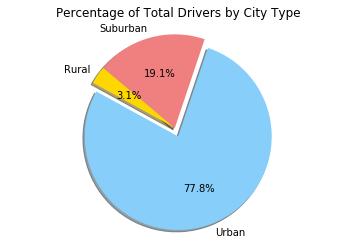

In [37]:
plt.show()